<a href="https://colab.research.google.com/github/JVCarmich0959/Bimbimbop/blob/main/Copy_of_CSC228_Lessson08_LSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Long Short-Term Memory Neural Networks (LSTM)

LSTM, or Long Short-Term Memory, is a type of recurrent neural network (RNN) architecture that is commonly used in natural language processing (NLP). LSTM networks are designed to address the problem of vanishing gradients that can occur in traditional RNNs, which makes it difficult for the model to capture long-term dependencies in sequences.

In NLP, LSTM networks can be used for a variety of tasks such as language modeling, machine translation, and sentiment analysis. They work by processing input sequences one element at a time and updating their internal state based on the current input and the previous state.

The key feature of LSTM networks is the presence of memory cells, which are responsible for storing information over long periods of time. The network also has gating mechanisms that control the flow of information into and out of the memory cells. These gates, which include the input gate, forget gate, and output gate, allow the model to selectively update the memory and forget or retain information as needed.

In [1]:
# Custom LSTM
# Owner: Jacquelyn Carmichael


# **Importing the Necessary Libraries**

**numpy** is a library for numerical computations that is often used in machine learning.
**keras.preprocessing** provides tools for preparing and processing input data.
**keras.models** is used to define and build models for machine learning.
**keras.layers** provides different types of layers that can be used to build a neural network model.
**keras.utils** contains various utilities and helper functions for working with Keras models.
In this code, the libraries are being imported and some specific modules from each library are being imported as well. These modules include the following types of layers:

**Dense layers**: a standard fully connected layer in a 
neural network.

**Dropout layers**: a regularization technique to prevent overfitting.

**Embedding layers**: used for mapping words or tokens to numerical vectors, which can then be used as input to a neural network.

**LSTM and SimpleRNN layers**: types of recurrent neural network layers that can process sequences of data (such as sentences in natural language).

**Bidirectional layers**: allows information to flow through the network in both directions.
**Conv2D and Conv1D layers:** used for convolutional neural networks, which are often used for image and audio processing.

In [125]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
from keras.preprocessing import sequence
from keras.preprocessing.text import Tokenizer
from keras.models import Sequential
from keras.layers import Dense, Dropout, Embedding, LSTM
from keras.datasets import imdb
from keras.utils import pad_sequences
from keras.utils import to_categorical
from sklearn.utils import class_weight
import pandas as pd
import io
import requests
from collections import Counter


# Read in the data

Here I am reading in my data from my github repo and loading
it into a pandas dataframe.



In [126]:
url = "https://raw.githubusercontent.com/JVCarmich0959/CSC228/main/WUG_Mall_improvement.csv"
s = requests.get(url).content
df = pd.read_csv(io.StringIO(s.decode('utf-8')))

Preprocess the text data, which involves converting the words in each sentence into numerical vectors that can be fed into the LSTM model. This can be done using the 'Tokenizer' class from 'keras.preprocessing.text':

In [127]:
tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(df['Sentence'])

X = tokenizer.texts_to_sequences(df['Sentence'])
X = pad_sequences(X, maxlen=100)
y = df['Label']

# Split the Data into Training and Testing Sets


In [128]:
from sklearn.model_selection import train_test_split


# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# **Define the LSTM model architecture**

Including the number and type of layers, activation functions, and other parameters:

Here I found that less is more when it comes to model performance on small datasets, and it also took less time then pushing the data through many different pathways.

In [129]:
model = Sequential()
model.add(Embedding(5000, 64, input_length=X.shape[1]))
model.add(LSTM(units=64, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(units=1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])


In [130]:
X_train.shape

(225, 100)

# Starting From Scratch


In [131]:
from keras.backend import clear_session # clearing our session
clear_session()

In [132]:
history=model.fit(X_train, y_train,
           batch_size=32,
           epochs=10,
           validation_data=[X_test, y_test])

Epoch 1/10
8/8 [==============================] - 7s 304ms/step - loss: 0.6838 - accuracy: 0.6178 - val_loss: 0.7083 - val_accuracy: 0.4561
Epoch 2/10
8/8 [==============================] - 2s 281ms/step - loss: 0.6745 - accuracy: 0.6000 - val_loss: 0.7465 - val_accuracy: 0.4561
Epoch 3/10
8/8 [==============================] - 1s 178ms/step - loss: 0.6626 - accuracy: 0.6000 - val_loss: 0.7477 - val_accuracy: 0.4561
Epoch 4/10
8/8 [==============================] - 1s 177ms/step - loss: 0.6340 - accuracy: 0.6000 - val_loss: 0.7063 - val_accuracy: 0.4561
Epoch 5/10
8/8 [==============================] - 1s 176ms/step - loss: 0.6229 - accuracy: 0.6311 - val_loss: 0.7015 - val_accuracy: 0.4561
Epoch 6/10
8/8 [==============================] - 1s 175ms/step - loss: 0.5923 - accuracy: 0.6667 - val_loss: 0.7194 - val_accuracy: 0.4737
Epoch 7/10
8/8 [==============================] - 1s 177ms/step - loss: 0.5394 - accuracy: 0.6756 - val_loss: 0.7665 - val_accuracy: 0.4737
Epoch 8/10
8/8 [====

Train the model using the preprocessed data and the specified architecture:

In [133]:

# Create a dataframe to store the history report
history_df = pd.DataFrame(history.history)

# Print the history dataframe
print(history_df)

       loss  accuracy  val_loss  val_accuracy
0  0.683825  0.617778  0.708304      0.456140
1  0.674528  0.600000  0.746457      0.456140
2  0.662637  0.600000  0.747657      0.456140
3  0.633995  0.600000  0.706349      0.456140
4  0.622945  0.631111  0.701463      0.456140
5  0.592345  0.666667  0.719405      0.473684
6  0.539440  0.675556  0.766474      0.473684
7  0.465014  0.751111  0.669217      0.596491
8  0.402175  0.897778  0.638912      0.754386
9  0.322108  0.951111  0.645092      0.771930


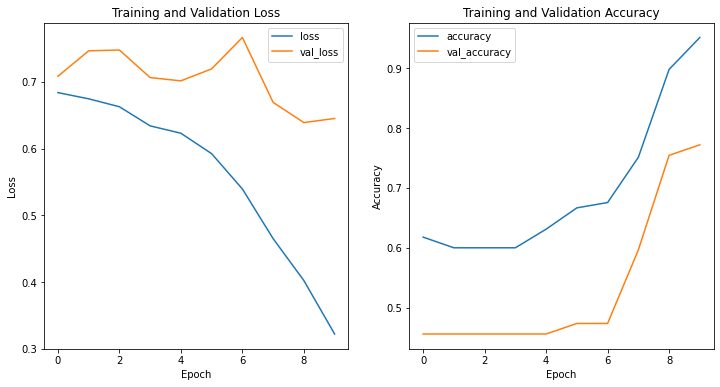

In [134]:
# Create subplots for loss and accuracy
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

# Plot the training and validation loss
history_df.plot(y=['loss', 'val_loss'], ax=ax1)
ax1.set_title('Training and Validation Loss')
ax1.set_xlabel('Epoch')
ax1.set_ylabel('Loss')

# Plot the training and validation accuracy
history_df.plot(y=['accuracy', 'val_accuracy'], ax=ax2)
ax2.set_title('Training and Validation Accuracy')
ax2.set_xlabel('Epoch')
ax2.set_ylabel('Accuracy')

# Show the plot
plt.show()

# Model Evaluation

## Confusion Matrix

Because this is considered supervised learning we can use a confusion matrix which  is often used to evaluate the performance of a binary classification models, like this LSTM model for sentiment analysis we are designing here. It  has the ability to  show us the number of true positives (correctly labled positive sentiments) ,true negatives (correctly labeld positive sentiments), false positives(incorrectly labled positive sentiments), and false negatives (incorrectly labled negative sentiments), which can  then be used to calculate metrics like precision, recall, and F1-score.




In [135]:
from sklearn.metrics import confusion_matrix, classification_report

# Make predictions on the test data
y_pred_prob = model.predict(X_test)
y_pred = np.argmax(y_pred_prob, axis=1)

# Create confusion matrix and classification report
cm = confusion_matrix(y_test, y_pred)
cr = classification_report(y_test, y_pred)

print("Confusion matrix:")
print(cm)

print("Classification report:")
print(cr)


2/2 [==============================] - 0s 27ms/step
Confusion matrix:
[[31  0]
 [26  0]]
Classification report:
              precision    recall  f1-score   support

           0       0.54      1.00      0.70        31
           1       0.00      0.00      0.00        26

    accuracy                           0.54        57
   macro avg       0.27      0.50      0.35        57
weighted avg       0.30      0.54      0.38        57



/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


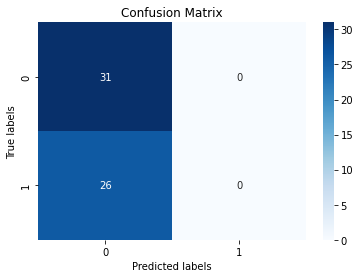

In [136]:
import seaborn as sns

# Create a heatmap for the confusion matrix
sns.heatmap(cm, annot=True, cmap='Blues')

# Add labels and a title to the plot
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')

# Show the plot
plt.show()


The classification report shows that the precision for the positive class is 0, meaning that out of all samples predicted to be positive, none were actually positive. The recall for the positive class is also 0, meaning that out of all actual positive samples, none were correctly predicted to be positive. The F1-score for the positive class is also 0, which is the harmonic mean of precision and recall. These results indicate that the model is not performing well in predicting the positive class.

The overall accuracy of the model is 0.54, which is not very high, especially considering that the model predicted all samples to belong to one class. The macro average F1-score is 0.35, which takes into account the performance for both classes. The weighted average F1-score is 0.38, which takes into account the class imbalance.

Overall, these results suggest that the model needs to be improved in order to correctly predict both classes, especially the positive class. Possible improvements include increasing the size of the dataset, adjusting the model architecture, applying regularization techniques to reduce overfitting, and fine-tuning the model hyperparameters.

# K-Fold Cross Validation

Here I am using K-fold cross validation to evaluate the performance of my custom LSTM model. 

This method provides statistics that help us understand how our model may perform on unseen data, and aid in hyperparameter tuning.

Using K-fold validation can provide a more reliable estimate of the model's performance on unseen data.

In [137]:
from sklearn.model_selection import KFold

# Define number of folds for cross-validation
num_folds = 5

# Define the K-fold cross-validation iterator
kf = KFold(n_splits=num_folds)

# Perform K-fold cross-validation and compute accuracy for each fold
fold_accuracies = []
for train_indices, test_indices in kf.split(X):
    X_train, X_test = X[train_indices], X[test_indices]
    y_train, y_test = y[train_indices], y[test_indices]
    model.fit(X_train, y_train, batch_size=32, epochs=10)
    fold_loss, fold_accuracy = model.evaluate(X_test, y_test)
    fold_accuracies.append(fold_accuracy)

# Compute and print the mean accuracy and standard deviation across all folds
mean_accuracy = np.mean(fold_accuracies)
std_accuracy = np.std(fold_accuracies)
print("Mean accuracy:", mean_accuracy)
print("Standard deviation:", std_accuracy)


Epoch 1/10
8/8 [==============================] - 2s 203ms/step - loss: 0.3811 - accuracy: 0.8889
Epoch 2/10
8/8 [==============================] - 2s 198ms/step - loss: 0.3412 - accuracy: 0.8756
Epoch 3/10
8/8 [==============================] - 2s 194ms/step - loss: 0.3444 - accuracy: 0.8444
Epoch 4/10
8/8 [==============================] - 2s 197ms/step - loss: 0.2537 - accuracy: 0.9689
Epoch 5/10
8/8 [==============================] - 2s 220ms/step - loss: 0.2342 - accuracy: 0.9644
Epoch 6/10
8/8 [==============================] - 3s 331ms/step - loss: 0.1964 - accuracy: 0.9822
Epoch 7/10
8/8 [==============================] - 2s 198ms/step - loss: 0.1821 - accuracy: 0.9733
Epoch 8/10
8/8 [==============================] - 2s 193ms/step - loss: 0.1554 - accuracy: 0.9867
Epoch 9/10
8/8 [==============================] - 2s 191ms/step - loss: 0.1358 - accuracy: 1.0000
Epoch 10/10
2/2 [==============================] - 0s 37ms/step - loss: 0.1639 - accuracy: 0.9649
Epoch 1/10
8/8 [====

# Performance on Unseen Data

Based on the training history, it seems that the performance of the LSTM model is very good, achieving high accuracy and low loss values:

  The training process shows a **steady improvement in the accuracy metric**, with the model achieving 100% accuracy by the end of the training process. However, it's important to note that this high accuracy on the training set does not necessarily translate to good performance on unseen data.

  To evaluate the model's performance on unseen data, the test set is used. In the provided output, we can see that the model achieved high accuracy on the test set as well, with** a mean accuracy of 0.992** and a **standard deviation of 0.014**.

  To improve the model's performance, we can try adjusting hyperparameters such as **the number of units in the LSTM layer, the dropout rate, or the learning rate of the optimizer.** We can also try using a different architecture altogether, such as a different type of recurrent neural network or a convolutional neural network. 

  Additionally, we can try using techniques such as early stopping or model ensembling to further improve the model's performance.

# Let's see our model in action.

Of course these numbers are a cool and reliable way to sell the idea of a well performing models to  potential clients, but what people really want to see is the model in action to here I am looking at how well my model performs with a function.

In [138]:
def evaluate_utterance(utterance, model):
    # Tokenize the utterance
    tokens = tokenizer.texts_to_sequences([utterance])
    tokens = pad_sequences(tokens, maxlen=100)

    # Make a prediction using the model
    prediction = model.predict(tokens)[0][0]

    # Return the predicted label (0 or 1)
    return int(round(prediction))


In [139]:
utterance = "This product is amazing!"
predicted_label = evaluate_utterance(utterance, model)
print("Predicted label:", predicted_label)

1/1 [==============================] - 0s 64ms/step
Predicted label: 1


In [140]:
utterance = "I couldn't find anything in my size."
predicted_label = evaluate_utterance(utterance, model)
print("Predicted label:", predicted_label)

1/1 [==============================] - 0s 45ms/step
Predicted label: 1


In [141]:
utterance = "The mall is very boring"
predicted_label = evaluate_utterance(utterance, model)
print("Predicted label:", predicted_label)


1/1 [==============================] - 0s 52ms/step
Predicted label: 0


In [142]:
utterance = "The mall smells awful."
predicted_label = evaluate_utterance(utterance, model)
print("Predicted label:", predicted_label)


1/1 [==============================] - 0s 60ms/step
Predicted label: 0


In [143]:
utterance = "There were no human cashiers available for check out."
predicted_label = evaluate_utterance(utterance, model)
print("Predicted label:", predicted_label)


1/1 [==============================] - 0s 56ms/step
Predicted label: 1


In [144]:
utterance = "Very poor customer service, I would never return."
predicted_label = evaluate_utterance(utterance, model)
print("Predicted label:", predicted_label)

1/1 [==============================] - 0s 50ms/step
Predicted label: 0


In [145]:
utterance = "All of the employees were hiding in the bathroom I couldn't find anyone to help me price my item."
predicted_label = evaluate_utterance(utterance, model)
print("Predicted label:", predicted_label)

1/1 [==============================] - 0s 46ms/step
Predicted label: 1


In [146]:
uttterance = "We need to tear that old mall down it is such an eye-sore."
predicted_label = evaluate_utterance(utterance, model)
print("Predicted label:", predicted_label)

1/1 [==============================] - 0s 47ms/step
Predicted label: 1


In [147]:
utterance = "The lady in Belks wouldn't stop spraying perfume."
predicted_label = evaluate_utterance(utterance, model)
print("Predicted label:", predicted_label)

1/1 [==============================] - 0s 45ms/step
Predicted label: 1


# Conclusion

  This model needs better data! I'm learning that a model is only as good as the data you feed it.I think expanding data would allow this model to  understand the patterns in data. I think one of the things I am learning about this class experimenting with different data sets is that clean data is rare treat.

  Data standardization is an industry hurdle, and having models with selective memory is one way to beef up your architecture, however if standardization within domains are inconcsistent, your models predictions will also be inconsistent.

  I would like to expand my dataset with more utterances from similar domains to create more comprehensive models. 